In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, accuracy_score, classification_report

In [12]:
df = pd.read_csv("CC GENERAL.csv")

CLEANING

In [13]:
df = df.drop(columns=["CUST_ID"], errors="ignore")
df = df.fillna(df.median())

 SCALING

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

K-MEANS CLUSTERING

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

Evaluasi

In [16]:
sil_score = silhouette_score(df_scaled, df["Cluster"])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.1664601900140412


 PCA (VISUAL SAJA)

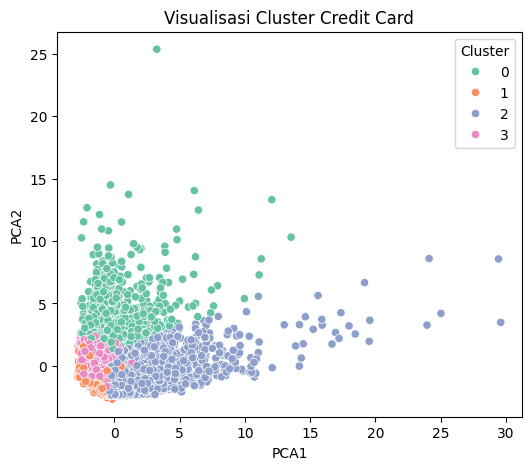

In [17]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Visualisasi Cluster Credit Card")
plt.show()

LOGISTIC REGRESSION

In [19]:
X = df_scaled
y = df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

logreg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

logreg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

EVALUASI

In [20]:
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9893854748603352

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       195
           1       0.99      0.99      0.99       297
           2       0.99      1.00      0.99       624
           3       0.99      0.99      0.99       674

    accuracy                           0.99      1790
   macro avg       0.99      0.98      0.99      1790
weighted avg       0.99      0.99      0.99      1790

Confusion Matrix:
 [[187   0   4   4]
 [  0 293   3   1]
 [  1   0 621   2]
 [  0   2   2 670]]


KOEFISIEN (AMAN)

In [21]:
coef_df = pd.DataFrame(
    logreg.coef_,
    columns=X.columns,
    index=[f"Cluster {i}" for i in logreg.classes_]
)

coef_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster 0,4.078300,1.605965,-0.116416,-0.076476,-0.133136,4.123878,-1.493629,-0.279237,-0.823856,4.422207,4.029026,0.336946,2.124097,1.958668,1.366707,-1.053236,-0.038941
Cluster 1,-2.527508,-6.193915,-0.942059,-0.722441,-0.858635,-1.575859,-0.441774,-1.212756,-0.941564,-2.364988,-1.629194,-1.527118,-1.055886,-1.089256,-1.065769,1.304605,-0.608639
Cluster 2,-1.054822,2.064226,1.820488,1.259280,1.946132,-1.809090,4.161871,2.297254,3.435075,-2.054461,-1.510005,2.233947,0.369202,0.278282,-0.282088,1.377527,0.619020
Cluster 3,-0.495970,2.523724,-0.762012,-0.460363,-0.954360,-0.738929,-2.226469,-0.805260,-1.669655,-0.002757,-0.889826,-1.043775,-1.437414,-1.147694,-0.018850,-1.628897,0.028561


SAVE MODEL

In [22]:
os.makedirs("model", exist_ok=True)

joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(kmeans, "model/kmeans.pkl")
joblib.dump(logreg, "model/logreg.pkl")
joblib.dump(X.columns.tolist(), "model/features.pkl")

print("✅ Semua model berhasil disimpan")

✅ Semua model berhasil disimpan
